In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances

In [2]:
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

/tmp/ipykernel_44589/2968410061.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [3]:
ratings_with_name = ratings.merge(books,on = "ISBN")

In [4]:
# Group by 'Book-Title' and count 'Book-Rating'
num_rating_df_t = ratings_with_name.groupby('Book-Title').count()['Book-Rating']

# Sort the DataFrame in descending order
num_rating_df_t = num_rating_df_t.sort_values(ascending=False).reset_index()
num_rating_df_t.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df_t
# Display the result
num_rating_df_t


,Book-Title,num_ratings
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828
...,...,...
241066,Real Love: The Truth About Finding Uncondition...,1
241067,Real Love: The Drawings for Sean,1
241068,"Real Love or Fake (Camfield Novel of Love, No 78)",1
241069,Fabulous Food for Family and Friends: Healthy ...,1


In [5]:
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

num_rating_df_t = ratings_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating']

num_rating_df_t = num_rating_df_t.to_frame()
num_rating_df_t.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)
num_rating_df_t = num_rating_df_t.reset_index()

num_rating_df_t

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [6]:
# Group by 'Book-Title' and count 'Book-Rating'
num_rating_df_t = ratings_with_name.groupby('Book-Title').agg({'Book-Rating': 'count'}).reset_index()

# Sort the DataFrame in descending order of ratings
num_rating_df_t = num_rating_df_t.sort_values(by='Book-Rating', ascending=False).reset_index(drop=True)

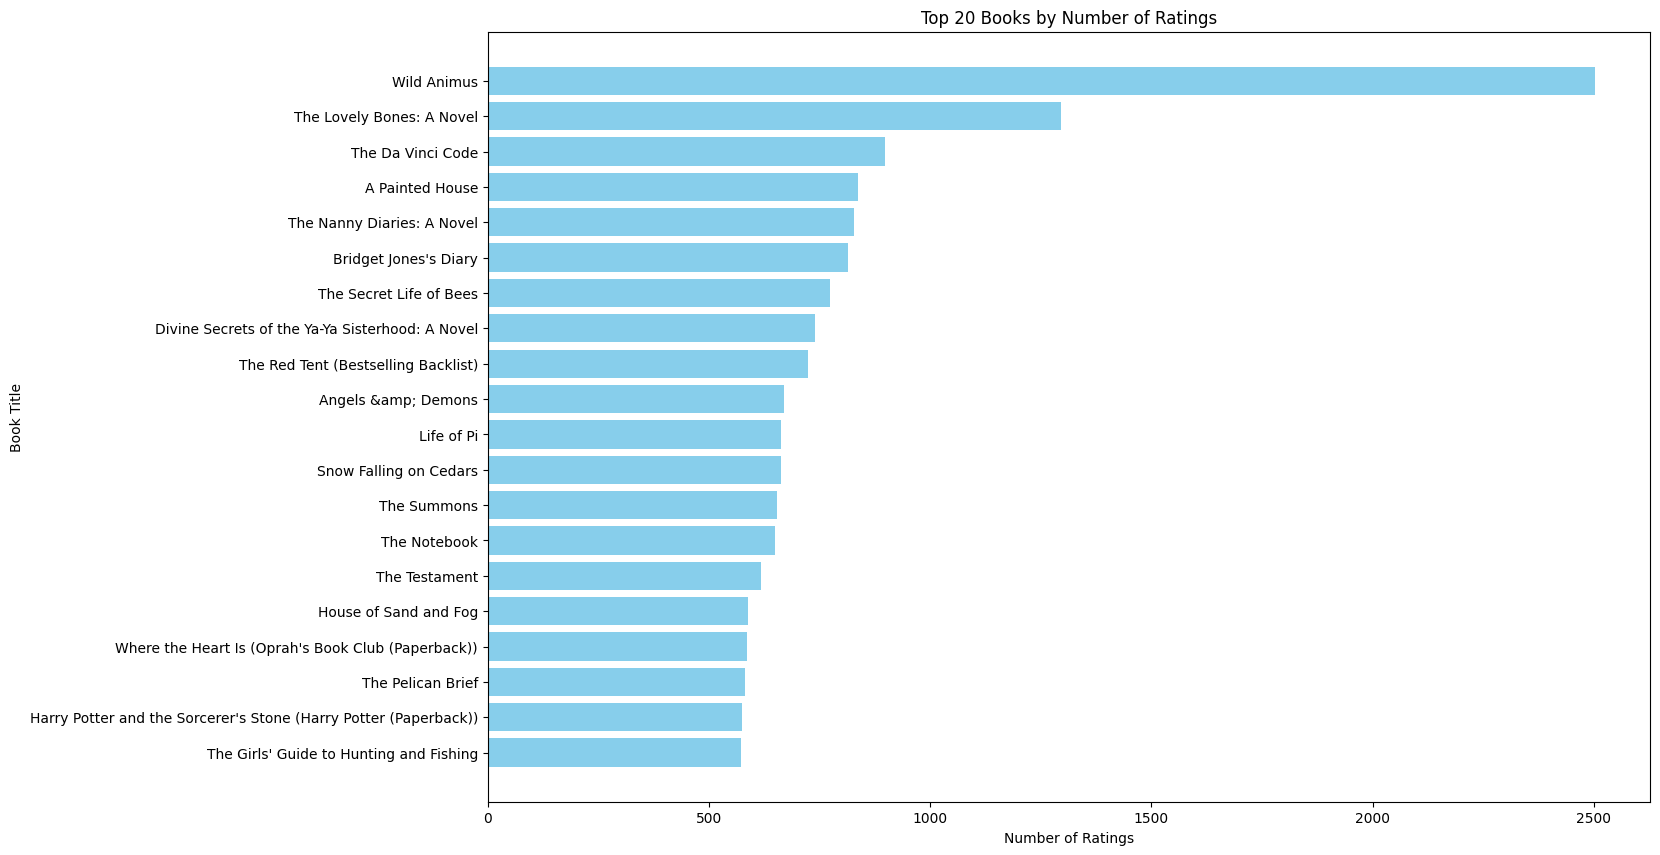

In [7]:
# Assuming num_rating_df has 'Book-Title' and 'Book-Rating' columns
plt.figure(figsize=(15, 10))

# Plot the top 20 books by number of ratings
plt.barh(num_rating_df_t['Book-Title'].head(20), num_rating_df_t['Book-Rating'].head(20), color='skyblue')

# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.title('Top 20 Books by Number of Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating on top

# Show the plot
plt.show()

In [8]:
# Group by 'Book-Author' and count 'Book-Rating'
num_rating_df = ratings_with_name.groupby('Book-Author').agg({'Book-Rating': 'count'}).reset_index()

# Sort the DataFrame in descending order of ratings
num_rating_df = num_rating_df.sort_values(by='Book-Author', ascending=False).reset_index(drop=True)

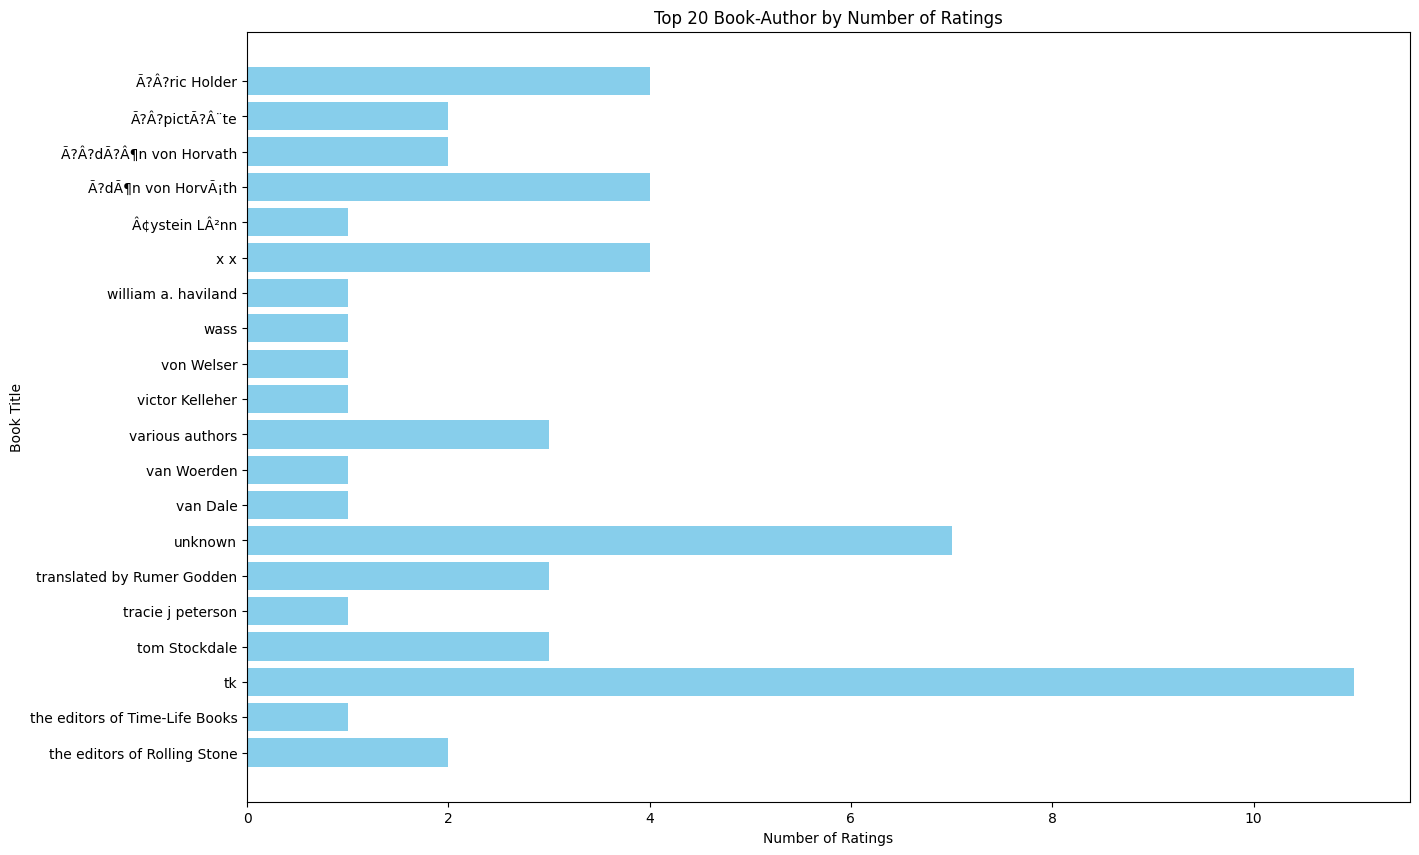

In [9]:
plt.figure(figsize=(15, 10))


plt.barh(num_rating_df['Book-Author'].head(20), num_rating_df['Book-Rating'].head(20), color='skyblue')

# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.title('Top 20 Book-Author by Number of Ratings')
plt.gca().invert_yaxis()  

# Show the plot
plt.show()

In [10]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [11]:
valid_ratings = ratings_with_name[pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce').notna()]
avg_rating_df = valid_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [12]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df


,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [13]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(60)
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [14]:


x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
book_reads = x[x].index



In [15]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(book_reads)]

In [16]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [17]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [18]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [19]:
pt.fillna(0,inplace=True)

In [20]:
similarity_scores = cosine_distances(pt)

In [21]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index == book_name )[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key = lambda x:x[1],reverse = True )[1:6]
    for i in similar_items:
        print(pt.index[i[0]])
    


In [22]:
recommend("1st to Die: A Novel")

A Widow for One Year
Artemis Fowl (Artemis Fowl, Book 1)
Beach House
Breath, Eyes, Memory
CAT'S EYE


In [25]:
recommend('4 Blondes')

1st to Die: A Novel
2nd Chance
A Bend in the Road
A Child Called \It\": One Child's Courage to Survive"
A Civil Action
